# WEEK_4 GROUP ACTIVITY.
1. Compare churn count with respect to gender. 
2. Find out how many female senior citizens there in the dataset 
3. Compare 'tenure' with 'Total Charges' 
4. Find out which contract preffered by the senior citizen. 
5. Comment on your finds on Payment Method?

In [16]:
#import all the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load the xls sheet to a variable named spreadsheet
spreadsheet = pd.ExcelFile(r"Telco-Customer-Churn.xlsx")
#Move the first sheet (with index value 0) to sstab1 
sstab1 = spreadsheet.parse(0)
sstab1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [17]:
sstab1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [18]:
sstab1.columns[sstab1.isnull().any()]

Index([], dtype='object')

In [19]:
sstab1.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# 1) Compare churn count with respect to gender.

In [20]:
#Move Gender and Churn columns to a new Data frame
genderchurn=pd.DataFrame(sstab1, columns=['gender','Churn'])

In [21]:
#Check the genderchurn dataframe and see if the values are populated
genderchurn

,gender,Churn
0,Female,No
1,Male,No
2,Male,Yes
3,Male,No
4,Female,Yes
...,...,...
7038,Male,No
7039,Female,No
7040,Female,No
7041,Male,Yes


In [23]:
#Add the counts of Males who has churn value as 'Yes'
MaleYes = genderchurn.loc[(genderchurn['gender']=='Male') & (genderchurn['Churn']=='Yes'),'gender'].count()


In [24]:
# Display the Male Churn count
MaleYes

930

In [25]:
#Add the counts of Males who has churn value as 'No'
MaleNo = genderchurn.loc[(genderchurn['gender']=='Male') & (genderchurn['Churn']=='No'),'gender'].count()

In [26]:
# Display the Male Churn=No count
MaleNo

2625

In [27]:
#Add the counts of Females who has churn value as 'Yes'
FemaleYes = genderchurn.loc[(genderchurn['gender']=='Female') & (genderchurn['Churn']=='Yes'),'gender'].count()

In [28]:
# Display the Male Churn count
FemaleYes

939

In [29]:
#Add the counts of Females who has churn value as 'No'
FemaleNo = genderchurn.loc[(genderchurn['gender']=='Female') & (genderchurn['Churn']=='No'),'gender'].count()

In [30]:
# Display the Female Churn=No count
FemaleNo

2549

In [31]:
#Take the total count and check if matches the number of rows
TotalCount = MaleYes + MaleNo + FemaleYes + FemaleNo
TotalCount

7043

<AxesSubplot:xlabel='count', ylabel='Churn'>

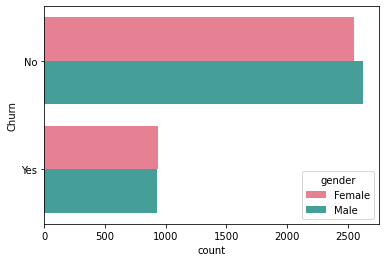

In [32]:
#Method 1 - Display the churn count for male and female in different palettes using sns
# Width of the graph represents the count
import seaborn as sns
sns.countplot(y='Churn', hue='gender', data=genderchurn, palette="husl")

<AxesSubplot:xlabel='gender'>

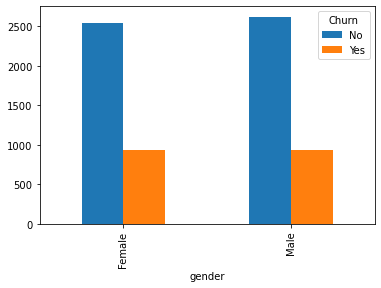

In [33]:
#Method 1 - Display the churn count for male and female in different palettes using sns
# height of the graph represents the count
gc1=genderchurn.groupby(['gender','Churn']).size()
gc2=gc1.unstack()
gc2.plot(kind='bar')

In [34]:
#Inference : 
#1 . Around 2500 males and females had a churn value of 'No'
#2. Under 1000 males and females had a churn value of 'Yes'


# 2) Find out how many female senior citizens there in the dataset 

In [40]:
#Create a new data frame using the columns 'gender' and 'Seniorcitizen'
genderss=pd.DataFrame(sstab1, columns=['gender','SeniorCitizen'])

In [41]:
#Check the count of Female senior citizens by checking for value '1' in SeniorCitizen and 'Female' in 'gender' columns
FemaleSScount = genderss.loc[(genderss['gender']=='Female') & (genderss['SeniorCitizen']==1),'gender'].count()
print("No of Female senior citizens = ", FemaleSScount)

No of Female senior citizens =  568


In [42]:
#Check the count of male senior citizens by checking for value '1' in SeniorCitizen and 'Male' in 'gender' columns
maleSScount = genderss.loc[(genderss['gender']=='Male') & (genderss['SeniorCitizen']==1),'gender'].count()
print("No of male senior citizens = ", maleSScount)

No of male senior citizens =  574


In [43]:
# Inference - There are 568 senior citizens who are Female

<AxesSubplot:xlabel='gender'>

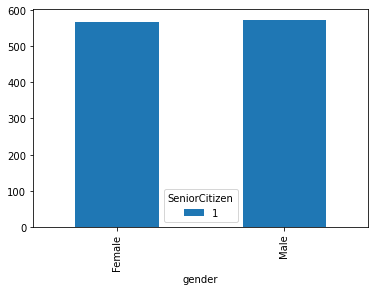

In [47]:
dffemaleSS= genderss[ (genderss['SeniorCitizen']==1)] 
ss1=dffemaleSS.groupby(['gender','SeniorCitizen']).size()
ss2=ss1.unstack()
ss2.plot(kind='bar')


In [3]:
# Inference - 
#1 . There are 568 senior citizens who are Female and 574 who are male
#2.  The number of Senior citizens almost match in each gender i.e around 570 in each gender

# 3) Compare 'tenure' with 'Total Charges' 

In [48]:
#Create a new dataframe by adding tenure and TotalCharges columns from the original spreadsheet
Tenure_TotalCharges=pd.DataFrame(sstab1, columns=['tenure','TotalCharges'])
#Check the Tenure_TotalCharges data frame 
Tenure_TotalCharges

,tenure,TotalCharges
0,1,29.85
1,34,1889.5
2,2,108.15
3,45,1840.75
4,2,151.65
...,...,...
7038,24,1990.5
7039,72,7362.9
7040,11,346.45
7041,4,306.6


<AxesSubplot:title={'center':' Avg TotalCharges'}>

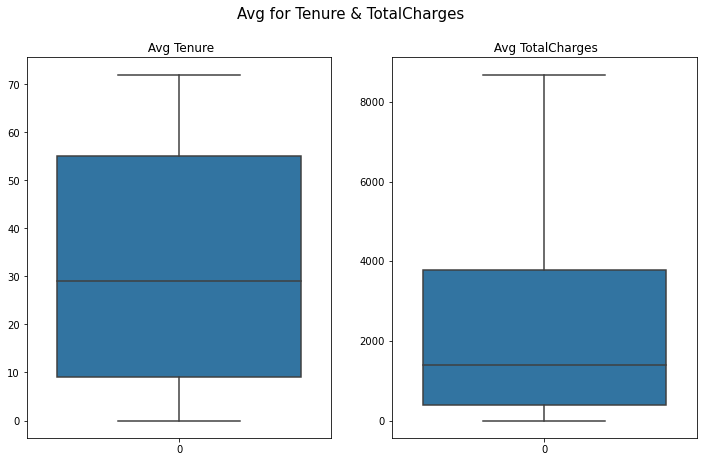

In [49]:
# Converting the datatype of TotalCharges from Object to Float
Tenure_TotalCharges ['TotalCharges'] = pd.to_numeric(Tenure_TotalCharges['TotalCharges'], errors='coerce')
Tenure_TotalCharges = Tenure_TotalCharges.replace(np.nan, 0, regex=True)
#Create abox plot for average tenure and Average TotalCharges
fig, axes = plt.subplots(1,2,figsize=(12,7))
fig.suptitle('Avg for Tenure & TotalCharges',fontsize=15)
axes[0].set_title(' Avg Tenure')
axes[1].set_title(' Avg TotalCharges')
sns.boxplot(ax=axes[0],data=Tenure_TotalCharges['tenure'])
sns.boxplot(ax=axes[1],data=Tenure_TotalCharges['TotalCharges'])

Text(0.5, 1.0, 'Tenure vs total charges')

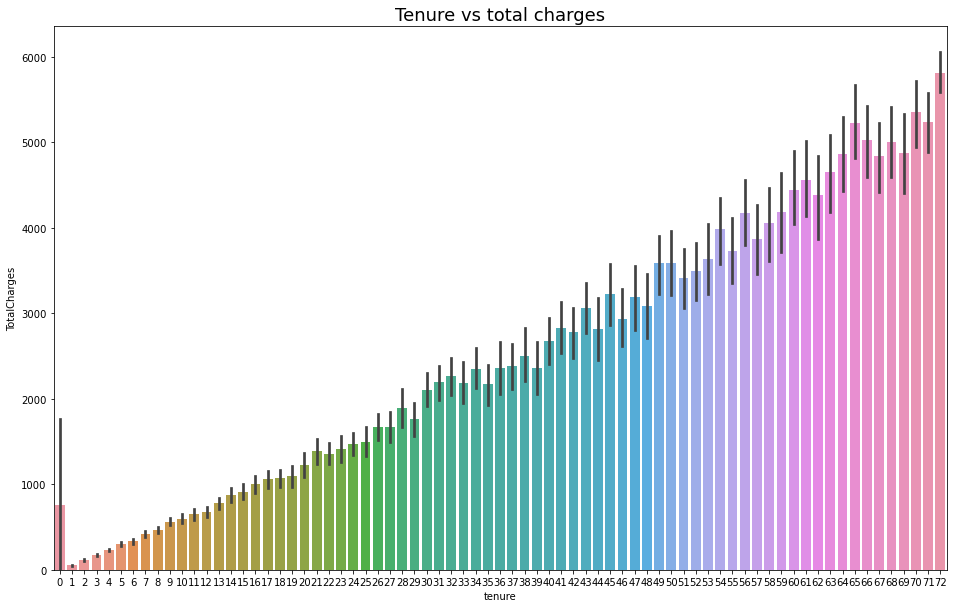

In [50]:
#Create abar plot of Tenure vs total Charges
plt.figure(figsize=(16,10))
sns.barplot(x='tenure',y='TotalCharges',data=Tenure_TotalCharges)
plt.title('Tenure vs total charges',fontsize=18)

In [ ]:
#Inference - As the tenure increases , the Total Charge also increase 


# 4) Find out which contract preffered by the senior citizen. 

In [51]:
#Create a dataframe containing SeniorCitizen and Contract
SScontract=pd.DataFrame(sstab1, columns=['SeniorCitizen','Contract'])

In [116]:
#Check the dataframe SScontract
SScontract

,SeniorCitizen,Contract
0,0,Month-to-month
1,0,One year
2,0,Month-to-month
3,0,One year
4,0,Month-to-month
...,...,...
7038,0,One year
7039,0,One year
7040,0,Month-to-month
7041,1,Month-to-month


In [52]:
#Filter the SeniorCitizen column = 1 to a new dataframe SS_prefered_contract
SS_prefered_contract = SScontract.loc[(SScontract['SeniorCitizen']==1) ]

In [30]:
#Check the SS_prefered_contract dataframe
SS_prefered_contract

,SeniorCitizen,Contract
20,1,Month-to-month
30,1,Two year
31,1,Month-to-month
34,1,Month-to-month
50,1,Month-to-month
...,...,...
7023,1,Month-to-month
7029,1,Month-to-month
7031,1,One year
7032,1,Month-to-month


<AxesSubplot:xlabel='SeniorCitizen'>

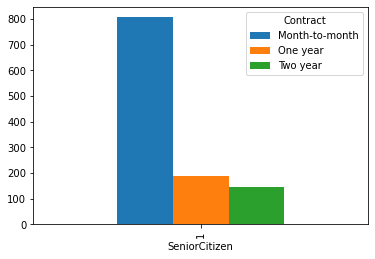

In [53]:
#Plot a bar graph and see the prefence for senior citizens 
SSC=SS_prefered_contract.groupby(['SeniorCitizen','Contract']).size()
SSC=SSC.unstack()
SSC.plot(kind='bar')

In [ ]:
#inference : It is clear that most of the senior citizens prefer Month-to-month contract.One year contact is 
# the 2nd most favorable and two year contract is the least favorable among senior citizens 

# 5) Comment on your finds on Payment Method

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

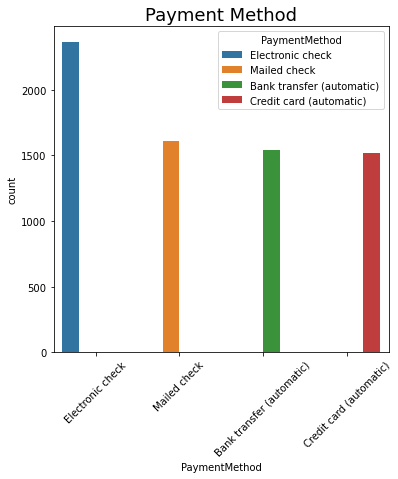

In [54]:
#1 - To find the most preferred payment method in general
sstab1["PaymentMethod"].value_counts()
plt.figure(figsize=(6,6))
sns.countplot(x='PaymentMethod',hue='PaymentMethod',data=sstab1)
plt.title("Payment Method",fontsize=18 )
plt.xticks(rotation=45)

In [ ]:
# Inference - Electronic check is the most preferred payment method followed by Mailed check,bank transfer and Credit card

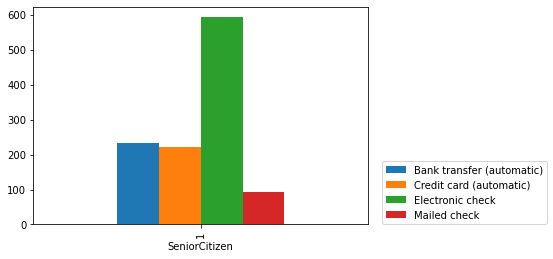

In [55]:
#Plot 2 - Prefered payment methods among senior citizens
SSpayment = pd.DataFrame(sstab1, columns=['SeniorCitizen','PaymentMethod'])
SS_prefered_payment = SSpayment.loc[(SSpayment['SeniorCitizen']==1) ]
SSP=SS_prefered_payment.groupby(['SeniorCitizen','PaymentMethod']).size()
SSP=SSP.unstack()
SSP.plot(kind='bar').legend(loc=(1.04,0),title="",prop={'size': 10})

In [ ]:
#Inference - Most senior citizens prefer Electronic check .Credit card and bank transfer have almost the 2nd preference. 
# The least preferred option by senior citizens is mailed check 

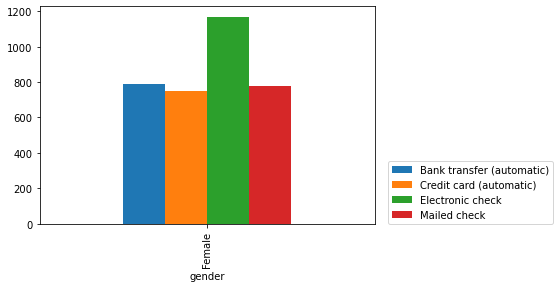

In [56]:
#Plot 3 . To find preferred payment method for females

GenderPayment = pd.DataFrame(sstab1, columns=['gender','PaymentMethod'])
# Preferred payment methods for females 
Female_prefered_payment = GenderPayment.loc[(GenderPayment['gender']=='Female') ]
FPP=Female_prefered_payment.groupby(['gender','PaymentMethod']).size()
FPP=FPP.unstack()
FPP.plot(kind='bar').legend(loc=(1.04,0),title="",prop={'size': 10})


In [ ]:
# Inference -Most females have an affinity towards Electronic check. Other 3 methods have almost an equal preference

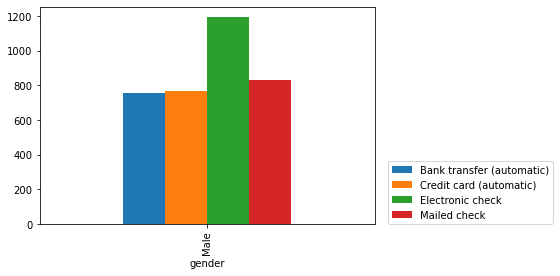

In [57]:
#Plot 4 . To find preferred payment method for males

GenderPayment = pd.DataFrame(sstab1, columns=['gender','PaymentMethod'])
# Preferred payment methods for females 
Female_prefered_payment = GenderPayment.loc[(GenderPayment['gender']=='Male') ]
FPP=Female_prefered_payment.groupby(['gender','PaymentMethod']).size()
FPP=FPP.unstack()
FPP.plot(kind='bar').legend(loc=(1.04,0),title="",prop={'size': 10})


In [ ]:
# Inference -Most males have an affinity towards Electronic check. Other 3 methods have almost an equal preference

Text(0, 0.5, 'Preference')

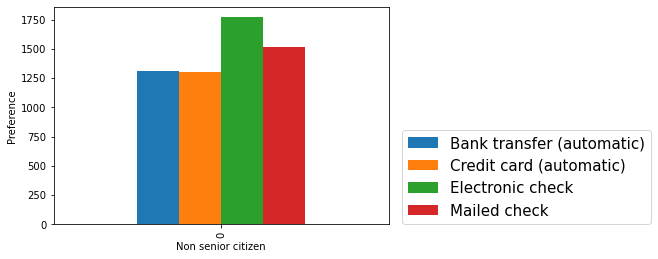

In [58]:
# Plot 5 - To find preferred payment methods for people under 60 
SSpayment = pd.DataFrame(sstab1, columns=['SeniorCitizen','PaymentMethod'])
Youth_prefered_payment = SSpayment.loc[(SSpayment['SeniorCitizen']==0) ]
YPF=Youth_prefered_payment.groupby(['SeniorCitizen','PaymentMethod']).size()
YPF=YPF.unstack()
YPF.plot(kind='bar').legend(loc=(1.04,0),title="",prop={'size': 15})
plt.xlabel("Non senior citizen")
plt.ylabel("Preference")

In [ ]:
# Inference - Most of the people who are aged below 60 prefer electronic check followed by mailed check. 
# They have almost equal preference towards  payments using bank transfer and credit cards

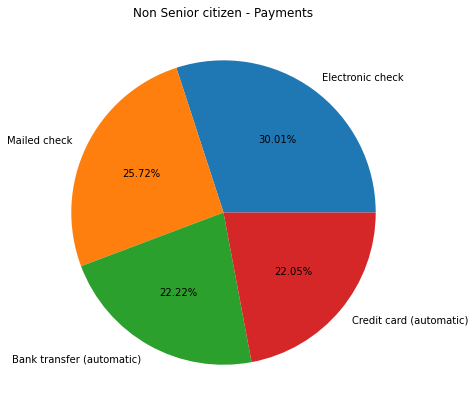

In [59]:
# Plot 6 - Plotting Pie chart for percentage of payments for people under 60
fig = plt.figure(figsize=(10,7))
plt.pie(SSpayment.loc[SSpayment['SeniorCitizen'] == 0, ['PaymentMethod']].value_counts().to_list(), labels = list(SSpayment['PaymentMethod'].unique()),autopct='%1.2f%%')
plt.title("Non Senior citizen - Payments")
plt.show()

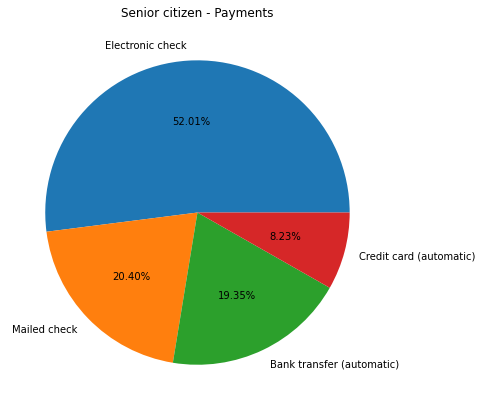

In [58]:
# Plot 7 - Plotting Pie chart for percentage of payments for senior citizens
fig = plt.figure(figsize=(10,7))
plt.pie(SSpayment.loc[SSpayment['SeniorCitizen'] == 1, ['PaymentMethod']].value_counts().to_list(), labels = list(SSpayment['PaymentMethod'].unique()),autopct='%1.2f%%')
plt.title("Senior citizen - Payments")
plt.show()

# THANKS!

# Presented by Team no 15
Harikrishnan Bhuvanendran, Viswaraj Chandran, Aneesh Akramannil, Rahna Babu C